# IMPORT LIBRARY

In [ ]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

# LOAD DATA

In [ ]:
df = pd.read_csv('HASIL_DONE2.csv', sep='\t')
text = df['textdata']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)


17024
[['hmmmmmmm', 'plot', 'neh', 'star', 'wars', 'laku', 'bejat', 'bongkar', 'mubahalah', 'berjln', 'mari', 'qta', 'simak', 'sinema', 'elektronik', 'azab', 'aparat', 'eehh'], ['bandar', 'judi', 'bandar', 'narkotika', 'psikotropika', 'dan', 'obat', 'larang', 'ambil', 'alih', 'ma', 'aparat', 'iiisshh', 'kasihan', 'ma', 'bandar', 'jelata', 'yes', 'eeehhh', 'ambil', 'alih', 'mami', 'rumah', 'bordil', 'eeeeeehhhh', 'dah', 'rek'], ['dah', 'reset', 'polisi', 'anggota', 'kriminal', 'laku', 'bejat', 'sarang', 'mafia', 'biadab', 'rakyat', 'sopan', 'koruptor', 'taipan', 'keji', 'kejam', 'tenang', 'hidup', 'rakyat', 'polisi', 'model'], ['lihat', 'asli', 'kpk', 'tunggang', 'politik', 'firli', 'balas', 'budi'], ['astaghfirullah', 'adziim', 'bejat', 'seh', 'mrk', 'lakuin'], ['what', 'the', 'fuck'], ['pingcc'], ['astaghfirullah', 'adziim'], ['layak', 'manusia', 'laku', 'perempuan'], ['blokir', 'elite', 'aman', 'sulitudah', 'tua', 'sok', 'sok', 'atas', 'nama', 'jaga'], ['bersihbersih', 'jabat', 'bren

# Phrase Modeling: Bigram and Trigram Models

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

# CREATE DICTIONARY AND CORPUS

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(4971 unique tokens: ['aparat', 'azab', 'bejat', 'bongkar', 'elektronik']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
corpus = [dictionary.doc2bow(doc) for doc in text_list]
# #The function doc2bow converts document (a list of words) into the bag-of-words format
# '''The function doc2bow() simply counts the number of occurrences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector. 
# The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
# the words computer (id 0) and human (id 1) appear once; 
# the other ten dictionary words appear (implicitly) zero times.'''
# print(len(doc_term_matrix))
# print(doc_term_matrix[100])
# tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
# corpus_tfidf = tfidf[doc_term_matrix]

# COHERENCE SCORE

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# VISUALISASI COHERENCE SCORE

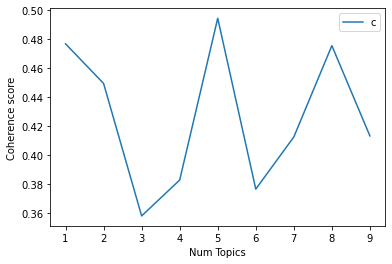

In [ ]:
start=1
limit=10
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.476921
Num Topics = 2  has Coherence Value of 0.449605
Num Topics = 3  has Coherence Value of 0.358299
Num Topics = 4  has Coherence Value of 0.383016
Num Topics = 5  has Coherence Value of 0.49456
Num Topics = 6  has Coherence Value of 0.376788
Num Topics = 7  has Coherence Value of 0.412716
Num Topics = 8  has Coherence Value of 0.475673
Num Topics = 9  has Coherence Value of 0.413424


In [ ]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(10)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.476921
1,2,0.449605
2,3,0.358299
3,4,0.383016
4,5,0.494560
5,6,0.376788
6,7,0.412716
7,8,0.475673
8,9,0.413424


In [ ]:
coherence_df.to_csv('coherence-value-final.csv', index=False)

# CREATE MODEL

In [ ]:
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
# for idx, topic in model.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic)) 
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1:
Word: 0.015*"polisi" + 0.015*"bunuh" + 0.012*"siswa" + 0.012*"brigadir" + 0.012*"hukum" + 0.011*"bunuh_brigadir" + 0.009*"piscok" + 0.009*"komnas_ham" + 0.008*"rizky_billar" + 0.007*"putri_candrawathi"

Topic 2:
Word: 0.023*"iwan_bule" + 0.021*"tragedi_kanjuruhan" + 0.018*"putri_candrawathi" + 0.017*"polisi" + 0.012*"tragedi" + 0.012*"kanjuruhan" + 0.011*"bule" + 0.010*"jokowi" + 0.010*"cebong" + 0.009*"cebong_ollie"

Topic 3:
Word: 0.043*"dan_obat" + 0.037*"teddy_minahasa" + 0.026*"dan" + 0.026*"teddy" + 0.025*"narkotika" + 0.025*"obat" + 0.024*"psikotropika" + 0.024*"kapolda_jatim" + 0.024*"minahasa" + 0.023*"larang"

Topic 4:
Word: 0.049*"irjen_teddy" + 0.027*"irjen" + 0.022*"gas_air" + 0.020*"kapolri" + 0.015*"polisi" + 0.014*"listyo_sigit" + 0.013*"teddy" + 0.013*"gas" + 0.012*"kapolri_jenderal" + 0.012*"mata"

Topic 5:
Word: 0.040*"kapolda" + 0.018*"oknum_polisi" + 0.014*"kapolda_jawa" + 0.012*"iwan" + 0.010*"polisi" + 0.009*"oknum" + 0.009*"polda_metro" + 0.008*"the" + 

# DOMINANT TOPIC

In [ ]:
# Word Count of Topic Keywords

from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

                  word  topic_id  importance  word_count
0               polisi         0    0.015248        1717
1                bunuh         0    0.014610        1555
2                siswa         0    0.012317         250
3             brigadir         0    0.012226        2491
4                hukum         0    0.012070         931
5       bunuh_brigadir         0    0.010625        1578
6               piscok         0    0.008986         200
7           komnas_ham         0    0.008839         697
8         rizky_billar         0    0.008148         251
9    putri_candrawathi         0    0.007251        2803
10           iwan_bule         1    0.023263         513
11  tragedi_kanjuruhan         1    0.021225         414
12   putri_candrawathi         1    0.017870        2803
13              polisi         1    0.017494        1717
14             tragedi         1    0.011885         279
15          kanjuruhan         1    0.011670         297
16                bule         

In [ ]:
df_imp_wcount.to_csv('wcount5.csv', index=False)

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words5.csv")
print(df)

None


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=text_list)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.5971,"dan_obat, teddy_minahasa, dan, teddy, narkotik...","[hmmmmmmm, plot, neh, star, wars, laku, bejat,..."
1,1,2.0,0.5688,"dan_obat, teddy_minahasa, dan, teddy, narkotik...","[bandar, judi, bandar, narkotika, psikotropika..."
2,2,2.0,0.4446,"dan_obat, teddy_minahasa, dan, teddy, narkotik...","[dah, reset, polisi, anggota, kriminal, laku, ..."
3,3,3.0,0.8983,"irjen_teddy, irjen, gas_air, kapolri, polisi, ...","[lihat, asli, kpk, tunggang, politik, firli, b..."
4,4,3.0,0.4966,"irjen_teddy, irjen, gas_air, kapolri, polisi, ...","[astaghfirullah, adziim, bejat, seh, mrk, lakuin]"
5,5,2.0,0.6959,"dan_obat, teddy_minahasa, dan, teddy, narkotik...","[what, the, fuck, what_the]"
6,6,0.0,0.2000,"polisi, bunuh, siswa, brigadir, hukum, bunuh_b...",[pingcc]
7,7,1.0,0.5966,"iwan_bule, tragedi_kanjuruhan, putri_candrawat...","[astaghfirullah, adziim]"
8,8,1.0,0.5886,"iwan_bule, tragedi_kanjuruhan, putri_candrawat...","[layak, manusia, laku, perempuan]"
9,9,1.0,0.9259,"iwan_bule, tragedi_kanjuruhan, putri_candrawat...","[blokir, elite, aman, sulitudah, tua, sok, sok..."


In [ ]:
# save the df_dominant_topic
df_dominant_topic.to_csv('dominant_topic_resuls5.csv', index=False)

# PyLDAvis

In [ ]:
pip install pyldavis==3.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=79e282c932e92d5bf918990882f14b91328b8ea81e970e6e171560d43b1db160
  Stored in directory: /root/.cache/pip/wheels/c6/ee/a6/7c17a63623f940dff0b9cbd7e48a27543f088fa55a7d2b62d0
Successfully built pyldavis


In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim5.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.064040  0.208753       1        1  23.501584
1     -0.139384  0.072209       2        1  20.585526
3      0.108556 -0.001231       3        1  20.546736
4     -0.156571 -0.230148       4        1  19.860083
2      0.251440 -0.049584       5        1  15.506070, topic_info=                Term         Freq        Total Category  logprob  loglift
2642     irjen_teddy  2180.000000  2180.000000  Default  30.0000  30.0000
1149         kapolda  1738.000000  1738.000000  Default  29.0000  29.0000
20          dan_obat  1492.000000  1492.000000  Default  28.0000  28.0000
2555  teddy_minahasa  1330.000000  1330.000000  Default  27.0000  27.0000
2554           teddy  1447.000000  1447.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
536            irjen   260.754590  1511.637348   Topic5  -4.8

In [ ]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.064040  0.208753       1        1  23.501584
1     -0.139384  0.072209       2        1  20.585526
3      0.108556 -0.001231       3        1  20.546736
4     -0.156571 -0.230148       4        1  19.860083
2      0.251440 -0.049584       5        1  15.506070, topic_info=                Term         Freq        Total Category  logprob  loglift
2642     irjen_teddy  2180.000000  2180.000000  Default  30.0000  30.0000
1149         kapolda  1738.000000  1738.000000  Default  29.0000  29.0000
20          dan_obat  1492.000000  1492.000000  Default  28.0000  28.0000
2555  teddy_minahasa  1330.000000  1330.000000  Default  27.0000  27.0000
2554           teddy  1447.000000  1447.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
536            irjen   260.754590  1511.637348   Topic5  -4.8649   0.1066
89            sangka   195.546786   666.579573   Topic5  -5.1527   0.6376
143            bunuh   219.644148  1296.441134   Topic5  -5.0365   0.0886
126          kapolri   186.076115  1556.798515   Topic5  -5.2024  -0.2603
602             duga   154.730871   542.368250   Topic5  -5.3868   0.6097

[347 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2568      2  0.966007  acara_keluarga
2568      5  0.020337  acara_keluarga
4776      3  0.016365     ade_armando
4776      4  0.973730     ade_armando
1672      1  0.982347            adik
...     ...       ...             ...
523       3  0.093345           warga
523       4  0.742091           warga
523       5  0.009334           warga
2345      2  0.973218              we
1419      1  0.986717           wujud

[767 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

# WORDCLOUD

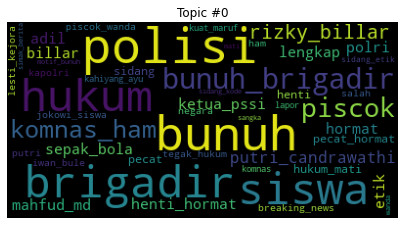

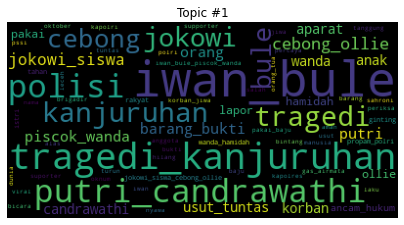

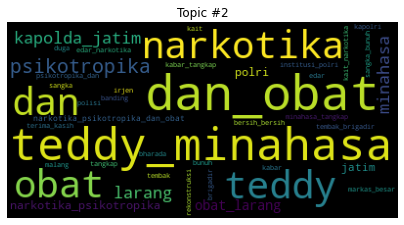

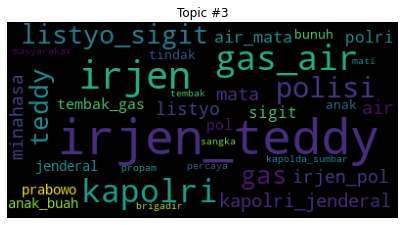

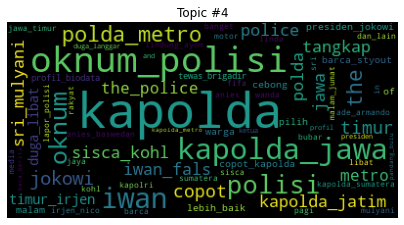

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()